# Exercise 2.2 | Data Transformations

This exercise demostrates how to:
1) Transform nominal prices to real prices
2) Standardize coffee shop opening times by timezone
3) Convert from linear to log scales

In [47]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# File Path
file_path = 'https://tayweid.github.io/econ-0150/parts/part-2-2/data/'

## Real Price Conversion

In [46]:
cpi = pd.read_csv(file_path + 'Coffee_Prices_CPI.csv', index_col=0)
cpi.head()

,date,price,date_column,year,today,cpi
0,8/20/73,0.6735,8/20/73,1973,0.141221,44.4
1,8/21/73,0.6710,8/21/73,1973,0.141221,44.4
2,8/22/73,0.6580,8/22/73,1973,0.141221,44.4
3,8/23/73,0.6675,8/23/73,1973,0.141221,44.4
4,8/24/73,0.6660,8/24/73,1973,0.141221,44.4


In [ ]:
cpi['real_price'] = cpi['price'] / cpi['today']

## Standardize Times by Timezone

In [48]:
# Load Dataset
hours = pd.read_csv(file_path + 'Starbucks_Location_Hours.csv', index_col=0)
hours.head()

,storeNumber,country,opening_times,closing_times,open,close,GMT
0,34638-85784,HK,8:30:00,22:30:00,8,22,8
1,32141-267986,HK,7:30:00,22:00:00,7,22,8
2,15035-155445,HK,8:00:00,22:00:00,8,22,8
3,49646-268445,HK,8:00:00,22:00:00,8,22,8
4,31944-224544,HK,8:00:00,20:30:00,8,20,8


In [52]:
hours['openGMT'] = hours['open'] - hours['GMT']

<Axes: xlabel='openGMT', ylabel='Count'>

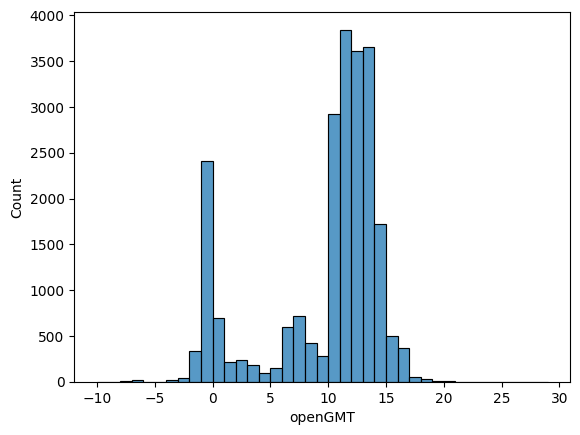

In [54]:
sns.histplot(hours, x='openGMT', bins=range(-10,30,1))

In [55]:
hours['openGMT24'] = hours['openGMT'].mod(24)

<Axes: xlabel='openGMT24', ylabel='Count'>

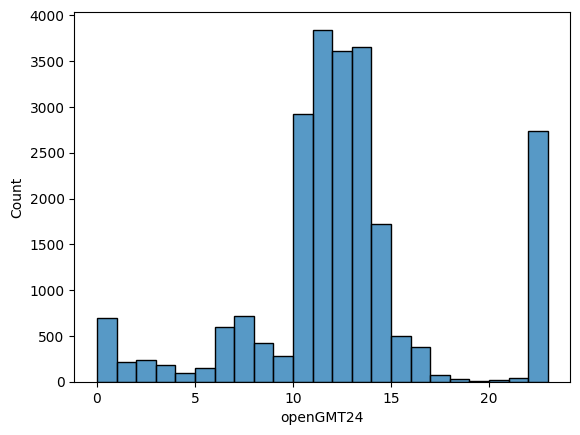

In [58]:
sns.histplot(hours, x='openGMT24', bins=range(0,24,1))

## Convert Scale from Linear to Log

In [59]:
gdp = pd.read_csv(file_path + 'Beans_GDP_2019.csv', index_col=0)
gdp.head()

,Code,Year,coffee_prod,Entity,GDP
49,AGO,2019,0.013257,Angola,0.227856
189,BOL,2019,0.024841,Bolivia,0.098836
248,BRA,2019,3.011745,Brazil,3.080049
307,BDI,2019,0.014059,Burundi,0.009110
416,CMR,2019,0.034061,Cameroon,0.094488


In [61]:
gdp['log_coffee_prod'] = np.log(gdp['coffee_prod'])

In [63]:
gdp['log_GDP'] = np.log(gdp['GDP'])

<Axes: xlabel='log_coffee_prod', ylabel='log_GDP'>

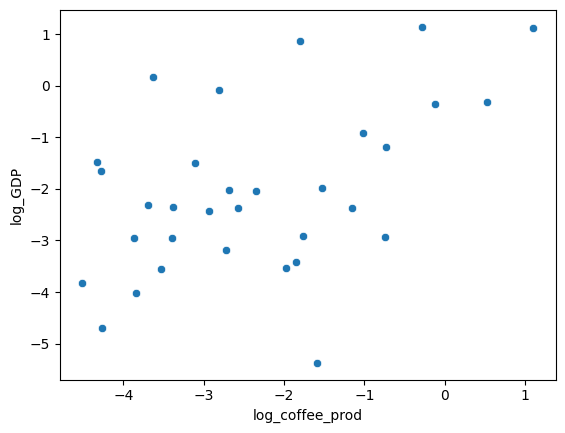

In [65]:
sns.scatterplot(gdp, x='log_coffee_prod', y='log_GDP')

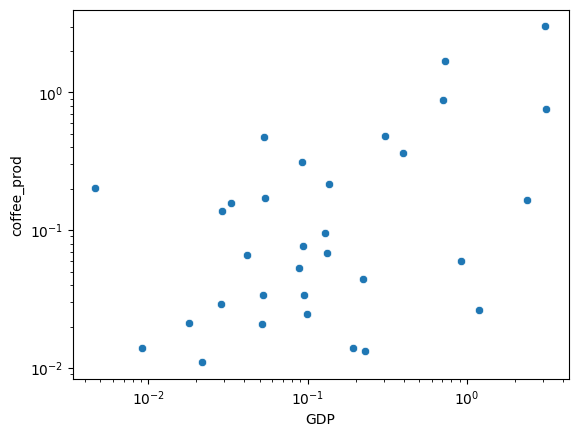

In [66]:
# Use a log scale without transforming the variable
sns.scatterplot(gdp, y='coffee_prod', x='GDP')
plt.xscale('log')
plt.yscale('log')

In [64]:
gdp.head()

,Code,Year,coffee_prod,Entity,GDP,log_coffee_prod,log_GDP
49,AGO,2019,0.013257,Angola,0.227856,-4.323267,-1.479043
189,BOL,2019,0.024841,Bolivia,0.098836,-3.695260,-2.314296
248,BRA,2019,3.011745,Brazil,3.080049,1.102520,1.124945
307,BDI,2019,0.014059,Burundi,0.009110,-4.264493,-4.698417
416,CMR,2019,0.034061,Cameroon,0.094488,-3.379593,-2.359287
